<a href="https://colab.research.google.com/github/Batman511/Numerical_methods_7sem/blob/main/4)%20%D0%A0%D0%B0%D0%B7%D0%BD%D0%BE%D1%81%D1%82%D0%BD%D1%8B%D0%B9%20%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%20%D0%B8%20%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%20%D0%BA%D0%BE%D0%BD%D0%B5%D1%87%D0%BD%D1%8B%D1%85%20%D1%8D%D0%BB%D0%B5%D0%BC%D0%B5%D0%BD%D1%82%D0%BE%D0%B2%20%D1%81%20%D0%BA%D1%83%D1%81%D0%BE%D1%87%D0%BD%D0%BE-%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%BC%D0%B8%20%D0%B1%D0%B0%D0%B7%D0%B8%D1%81%D0%BD%D1%8B%D0%BC%D0%B8%20%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Постановка задачи

In [ ]:
# Ограничения
x_min = 0
x_max = 1
y_min = 0
y_max = 2

# Шаг сетки
hx = 0.1
hy = 0.1

# сетка
Nx = int((x_max - x_min) / hx) + 1
Ny = int((y_max - y_min) / hy) + 1
xk, hx = np.linspace(x_min,x_max, Nx, retstep = True)
yk, hy = np.linspace(y_min,y_max, Ny, retstep = True)

In [ ]:
# аналитическое решение  u
def solution(x, y):
    return (3*x*x+y*y)*np.sin(2*x+y) + 3*x*x + 2*y

# правая часть уравнения Лапласа  u_xx + u_yy = f(x, y)
def f(x, y):
   return -5*(3*x*x+y*y)*np.sin(2*x+y) + 8*np.sin(2*x+y) + 24*x*np.cos(2*x+y) + 4*y*np.cos(2*x+y) + 6

# Граничные условия
def mu_x_1(y):
    """
    mu_x_1(y) = mu(0, y)
    """
    return y*(y*np.sin(y) + 2)

def mu_x_2(y):
    """
    mu_x_2(y) = mu(1, y)
    """
    return (y*y+3)*np.sin(y+2) + 2*y + 3

def mu_y_1(x):
    """
    mu_y_1(x) = mu(x, 0)
    """
    return 3*x*x*(np.sin(x) + np.cos(x))**2

def mu_y_2(x):
    """
    mu_y_2(x) = mu(x, 2)
    """
    return 3*x*x + (3*x*x + 4)*np.sin(2*x + 2) + 4

# Метод установления для решения задачи Дирихле для двумерного уравнения Пуассона в прямоугольнике (разностный метод)

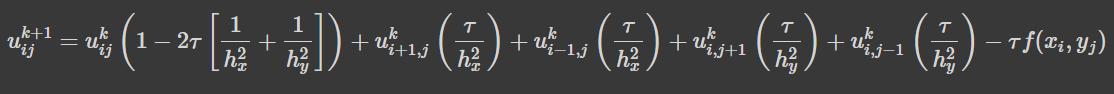

In [ ]:
def solver(task, net, eps=1e-5):
    f = task[0]
    mu_x1 = task[1]
    mu_x2 = task[2]
    mu_y1 = task[3]
    mu_y2 = task[4]

    hx, hy = net[0], net[1]
    x_min, x_max, y_min, y_max = net[2], net[3], net[4], net[5]  

    Nx = int((x_max - x_min) / hx) + 1
    xk = np.linspace(x_min, x_max, Nx)
    Ny = int((y_max - y_min) / hy) + 1
    yk = np.linspace(y_min, y_max, Ny)

    u = np.zeros((Nx, Ny))
    A = np.zeros((Nx, Ny))

    A[0, :] = [mu_x_1(y) for y in yk]
    A[-1, :] = [mu_x_2(y) for y in yk]
    A[:, 0] = [mu_y_1(x) for x in xk]
    A[:, -1] = [mu_y_2(x) for x in xk]

    tau = hx**2/4

    while np.max(np.abs(A - u)) > eps:

        tmp = u.copy()
        u[0, :] = [mu_x_1(y) for y in yk]
        u[-1, :] = [mu_x_2(y) for y in yk]
        u[:, 0] = [mu_y_1(x) for x in xk]
        u[:, -1] = [mu_y_2(x) for x in xk]

        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                u[i, j] = A[i, j]*(1 - 2 * tau * ((1 / hx**2) + (1 / hy**2))) + tau*(
                            (1 / hx**2) * (A[i + 1, j] + A[i - 1, j])
                            + (1 / hy**2) * (A[i, j + 1] + A[i, j - 1]) - f(xk[i], yk[j]))
        A = tmp.copy()
    return u.copy()  #.T

In [ ]:
# f, граница, сетка
task = (f, mu_x_1, mu_x_2, mu_y_1, mu_y_2)
net = (hx, hy, x_min, x_max, y_min, y_max)

u = solver(task, net, eps= 1e-5)
analytical_solution0 = np.array([solution(i, j) for i in xk for j in yk ])
analytical_solution = analytical_solution0.reshape((len(xk), len(yk)))

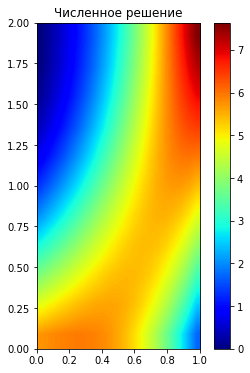

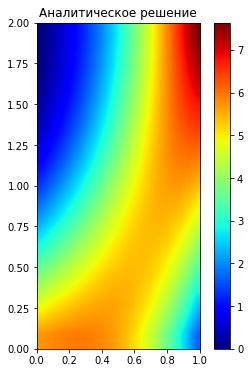

In [ ]:
plt.figure(figsize=(5,6))
plt.imshow(u, extent=[x_min, x_max, y_min, y_max], interpolation = 'bilinear', cmap = 'jet')
plt.colorbar()
plt.title("Численное решение")
plt.show()

plt.figure(figsize=(5,6))
plt.title("Аналитическое решение")
# plt.imshow(analytical_solution, extent=[x_min, x_max, y_min, y_max], cmap='rainbow', interpolation='bilinear')   # более плавный ,  cmap='magma'
plt.imshow(analytical_solution, extent=[x_min, x_max, y_min, y_max], interpolation = 'bilinear', cmap = 'jet')
plt.colorbar()
plt.show()

In [ ]:
print("Макс ошибка:           ",np.max(np.abs(analytical_solution-u)))

Макс ошибка:            0.008563292440909809


Карта распределения модуля разности численного решения и аналитического

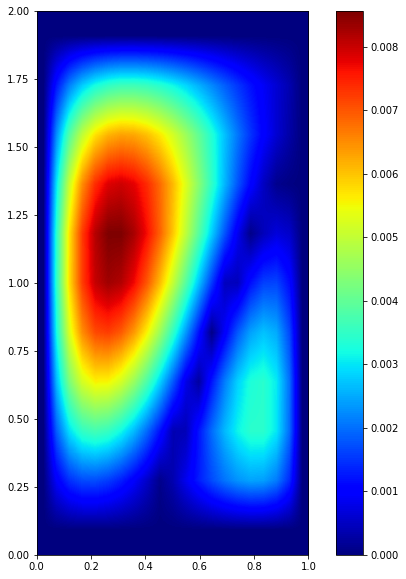

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(abs(u-analytical_solution), extent=[x_min, x_max, y_min, y_max], interpolation = 'bilinear', cmap = 'jet')
plt.colorbar()
plt.show()

# Доп

## Точечный заряд в проводе

Сетка

In [ ]:
# Ограничения
x_min = -1
x_max = 1
y_min = -1
y_max = 1

# Шаг сетки
hx = 0.05
hy = 0.05

# сетка
Nx = int((x_max - x_min) / hx) + 1
Ny = int((y_max - y_min) / hy) + 1
xk, hx = np.linspace(x_min,x_max, Nx, retstep = True)
yk, hy = np.linspace(y_min,y_max, Ny, retstep = True)

Задача Дирихле уравнения Пуассона

In [ ]:
# правая часть уравнения Лапласа  u_xx + u_yy = f(x, y)
def f(x, y):
    def delta(x, y, eps=0.05):
        return 1/(eps*np.sqrt(2*np.pi))*np.exp(-(x**2+y**2)/(2*eps**2))
    delta=np.vectorize(delta)
    return delta(x-0.3, y + 0.1)   

# Граничные условия
def mu_x_1(y):
    """
    mu_x_1(y) = mu(0, y)
    """
    return 0

def mu_x_2(y):
    """
    mu_x_2(y) = mu(1, y)
    """
    return 0

def mu_y_1(x):
    """
    mu_y_1(x) = mu(x, 0)
    """
    return 0

def mu_y_2(x):
    """
    mu_y_2(x) = mu(x, 2)
    """
    return 0

In [ ]:
def solver_dop(task, net, eps=1e-3):
    f = task[0]
    mu_x1 = task[1]
    mu_x2 = task[2]
    mu_y1 = task[3]
    mu_y2 = task[4]

    hx, hy = net[0], net[1]
    x_min, x_max, y_min, y_max = net[2], net[3], net[4], net[5]  

    Nx = int((x_max - x_min) / hx) + 1
    xk = np.linspace(x_min, x_max, Nx)
    Ny = int((y_max - y_min) / hy) + 1
    yk = np.linspace(y_min, y_max, Ny)

    u = np.zeros((Nx, Ny))
    A = np.ones((Nx, Ny)) * eps*2

    A[0, :] = [mu_x_1(y) for y in yk]
    A[-1, :] = [mu_x_2(y) for y in yk]
    A[:, 0] = [mu_y_1(x) for x in xk]
    A[:, -1] = [mu_y_2(x) for x in xk]

    tau = hx**2/4

    while np.max(np.abs(A - u)) > eps:

        tmp = u.copy()
        u[0, :] = [mu_x_1(y) for y in yk]
        u[-1, :] = [mu_x_2(y) for y in yk]
        u[:, 0] = [mu_y_1(x) for x in xk]
        u[:, -1] = [mu_y_2(x) for x in xk]

        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                u[i, j] = A[i, j]*(1 - 2 * tau * ((1 / hx**2) + (1 / hy**2))) + tau*(
                            (1 / hx**2) * (A[i + 1, j] + A[i - 1, j])
                            + (1 / hy**2) * (A[i, j + 1] + A[i, j - 1]) - f(xk[i], yk[j]))
        A = tmp.copy()
    return u.copy().T

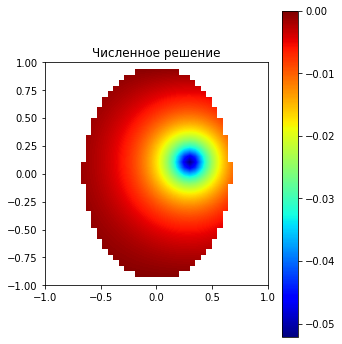

In [ ]:
# f, граница, сетка
task = (f, mu_x_1, mu_x_2, mu_y_1, mu_y_2)
net = (hx, hy, x_min, x_max, y_min, y_max)
u = solver_dop(task, net, eps= 1e-3)

for i in range(Nx):
    for j in range(Ny):
          if xk[i]**2 + 2*yk[j]**2 > 1:
        # if 4*(xk[i]-0.5)**2 + (yk[j]-1)**2 > 1:
            u[i][j] = np.nan

plt.figure(figsize=(5,6))
plt.imshow(u, extent=[x_min, x_max, y_min, y_max], interpolation = 'bilinear', cmap = 'jet')
plt.colorbar()
plt.title("Численное решение")
plt.show()

визуализация дельта функции

In [ ]:
import plotly.graph_objects as go

X = np.linspace(-1, 1, 101)
Y = np.linspace(-1, 1, 201)
Z = np.array([f(x, y) for x in X for y in Y]).reshape((101, 201))
fig = go.Figure(go.Surface(z=Z, x=X, y=Y))
fig.show()

Напряженность поля

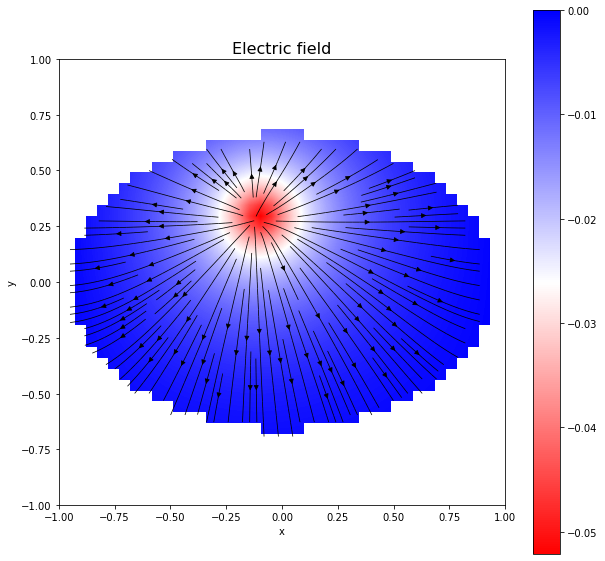

In [ ]:
vx = []
vy = []
dx = xk[1] - xk[0]
dy = yk[1] - yk[0]

for j in range(1, Ny-1):
    vx.append([])
    vy.append([])
    for i in range(1, Nx-1):
        Vx = (u[i+1,j] - u[i, j]) / dx
        Vy = (u[i,j+1] - u[i, j]) / dy
        
        vx[j-1].append(Vx)
        vy[j-1].append(Vy)
        
plt.figure(figsize=(10, 10))
plt.title('Electric field', fontsize=16)
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(np.flip(u.T, axis=0), extent=[x_min, x_max, y_min, y_max], cmap='bwr_r', interpolation='bilinear')
plt.colorbar()
plt.streamplot(xk[1:Nx-1], yk[1:Ny-1], np.array(vx), np.array(vy), density=2, linewidth=0.75, color='black') 
plt.show()

## Палатка

In [ ]:
x_min = 0
x_max = 2
y_min = 0
y_max = 2
hx = 0.02
hy = 0.02

def f(x, y):
  if np.abs(x - y) < 10**-5:
    ksi = np.sqrt(x**2 + y**2)
    return -ksi*(2*np.sqrt(2) - ksi)
  elif np.abs(y + x - 2) <10**-5:
    ksi = np.sqrt(x**2 + (2-y)**2)
    return -ksi*(2*np.sqrt(2) - ksi)
  else:
    return 0

def mu_x_1(y):
    return f(x_min, y)

def mu_x_2(y):
    return f(x_max, y)

def mu_y_1(x):
    return f(x, y_min)

def mu_y_2(x):
    return f(x, y_max)

In [ ]:
task = (f, mu_x_1, mu_x_2, mu_y_1, mu_y_2)
net = (hx, hy, x_min, x_max, y_min, y_max)
u = solver(task, net, eps= 1e-4)

График

In [ ]:
plt.imshow(u, extent=[x_min, x_max, y_min, y_max], cmap='plasma', interpolation='bilinear')
plt.colorbar()
plt.show()

Nx = int((x_max - x_min) / hx) + 1
xk = np.linspace(x_min, x_max, Nx)
Ny = int((y_max - y_min) / hy) + 1
yk = np.linspace(y_min, y_max, Ny)

X, Y = np.meshgrid(xk, yk)
fig = go.Figure(go.Surface(z=u, x=X, y=Y))
fig.show()